In [1]:
#ladataan tarvittavat kirjastot
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#avataan data ja muokataan uusia sarakkeita, joissa maalit, laukaukset ja päästetyt maalit suhteutetaan per ottelu
data = pd.read_excel('C:/Users/teemu/OneDrive/Työpöytä/Fbref_Stat_calc.xlsx', sheet_name = 'Sarja')
data['netG/90'] = data['netG/90'].round(2)
data['PpM'] = data['PpM'].round(2)
G90 = data['TM']/data['O']
data['G90'] = G90.round(2)
S90 = data['L']/data['O']
data['S90'] = S90.round(2)
GA90 = data['PM']/data['O']
data['GA90'] = GA90.round(2)
data.head()

,#,Joukkue,O,V,T,H,TM,PM,ME,S,...,R,KK,PK,PA,P,netG/90,PpM,G90,S90,GA90
0,1.0,HJK,22,14,6,2,53,17,36,29,...,238,39,0,38,48,1.64,2.18,2.41,14.59,0.77
1,2.0,FC Inter,22,12,5,5,36,17,19,28,...,261,50,0,61,41,0.86,1.86,1.64,10.41,0.77
2,3.0,KuPS,22,12,5,5,39,26,13,28,...,257,30,0,50,41,0.59,1.86,1.77,13.27,1.18
3,4.0,FC Honka,22,9,10,3,26,17,9,14,...,191,37,3,63,37,0.41,1.68,1.18,8.36,0.77
4,5.0,Ilves,22,10,6,6,37,29,8,26,...,242,51,2,34,36,0.36,1.64,1.68,13.05,1.32


In [6]:
#Valitaan vain analysoitava data eli joukkueen nimi, maalit per 90min, päästetyt maalit per 90min, laukaukset per 90min, laukaisutarkkuus, nettomaalit per 90min, pisteet per ottelu, voitot sekä rikkeet
data_clean = data[['Joukkue', 'G90', 'GA90', 'S90', 'L%', 'netG/90', 'PpM', 'V', 'R']]
data_clean.head()

,Joukkue,G90,GA90,S90,L%,netG/90,PpM,V,R
0,HJK,2.41,0.77,14.59,16.51,1.64,2.18,14,238
1,FC Inter,1.64,0.77,10.41,15.72,0.86,1.86,12,261
2,KuPS,1.77,1.18,13.27,13.36,0.59,1.86,12,257
3,FC Honka,1.18,0.77,8.36,14.13,0.41,1.68,9,191
4,Ilves,1.68,1.32,13.05,12.89,0.36,1.64,10,242


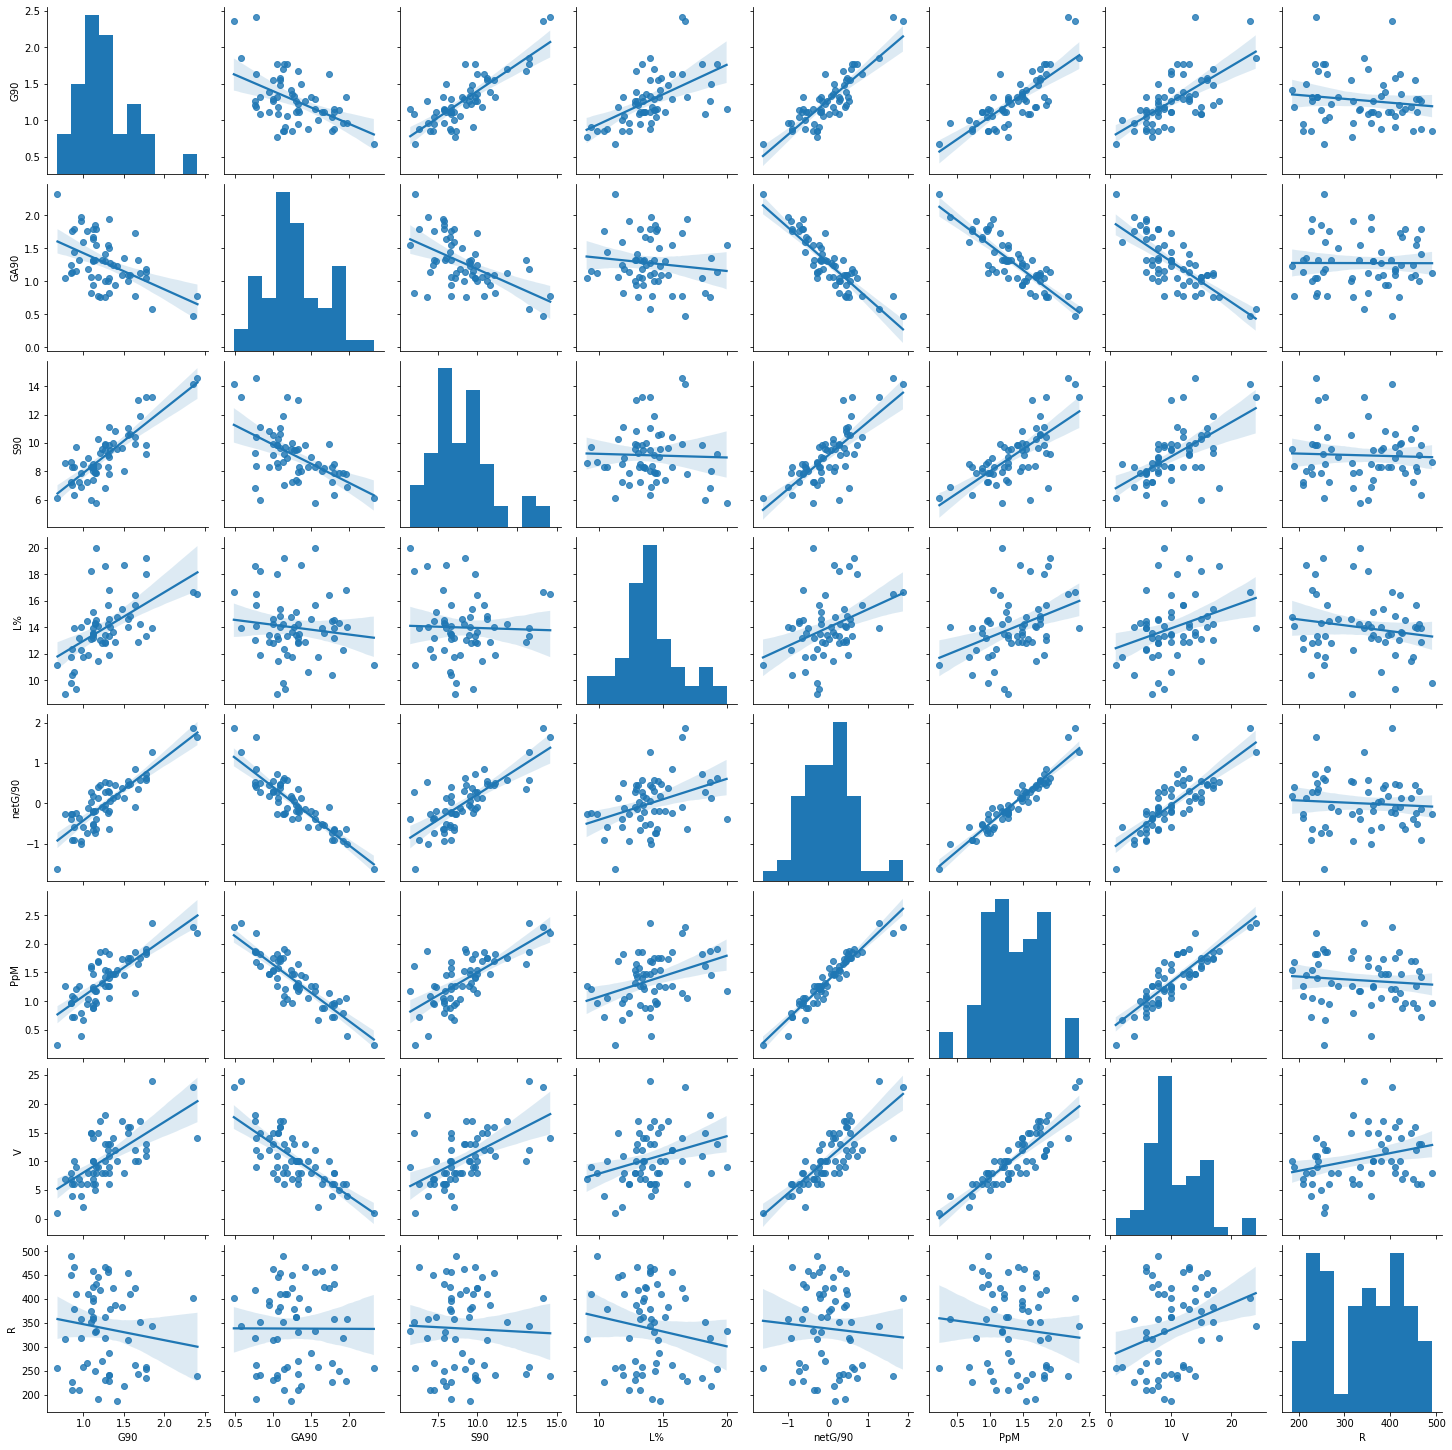

In [7]:
#hajontakaavio numeerisille muuttujille
sns.pairplot(data = data_clean, kind = 'reg')

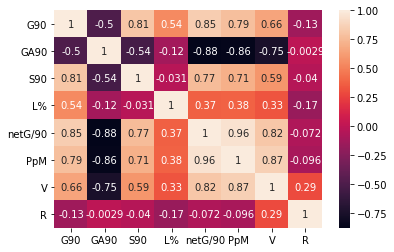

In [8]:
#korrelaatiomatriisin heatmap
sns.heatmap(data = data_clean.corr(), annot = True)

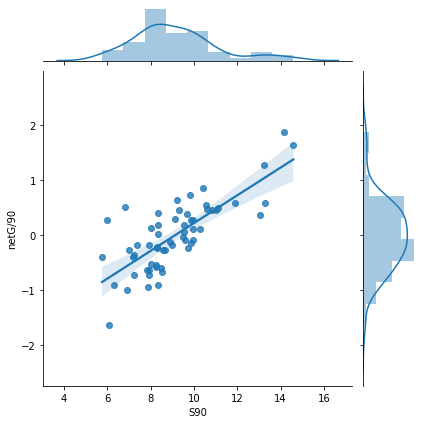

In [9]:
#2. muuttujan laukaukset ja nettomaalit per 90min korrelaatio
sns.jointplot(x = 'S90', y = 'netG/90', data = data_clean, kind = 'reg')

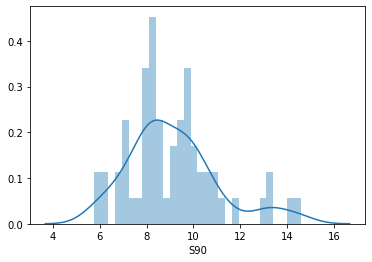

In [10]:
#selitettävän muuttujan laukauksien jakauma
sns.distplot(data_clean['S90'], bins = 30)